# PROBLEM STATEMENT

Let's assume that we work as a consultant to a start-up company that was looking to develop a model to estimate the cost of good sold as they vary the production volume (number of units produced). The startup gathered data and has asked us to develop a model to predict its cost vs. number of units sold. We thought a polynomial regression model might be a good candidate.

# STEP#1: IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP#2: IMPORT DATASET

In [ ]:
cost_df = pd.read_csv("EconomiesOfScale.csv")

In [ ]:
cost_df.head(100)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [ ]:
cost_df.tail()

,Number of Units,Manufacturing Cost
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [ ]:
cost_df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [ ]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Number of Units       1000 non-null float64
Manufacturing Cost    1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


# STEP#3: VISUALIZE DATASET

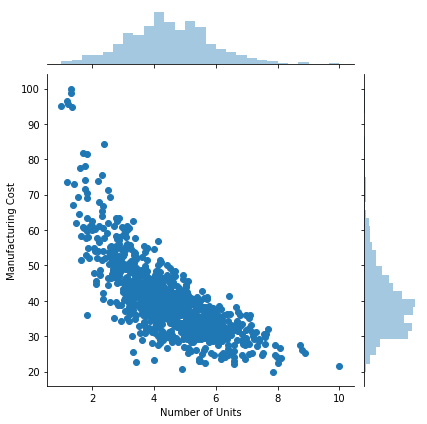

In [ ]:
sns.jointplot(x='Number of Units', y='Manufacturing Cost', data = cost_df)

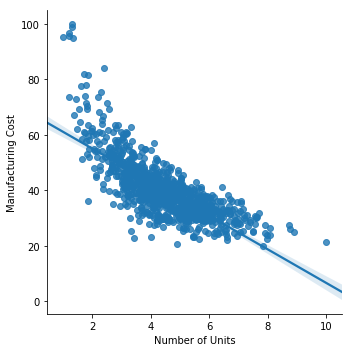

In [ ]:
sns.lmplot(x='Number of Units', y='Manufacturing Cost', data=cost_df)

# STEP#4: CREATE TRAINING DATASET

In [ ]:
X = cost_df[['Number of Units']]

In [ ]:
y = cost_df['Manufacturing Cost']

In [ ]:
# Note that we used the entire dataset for training only
X_train = X
y_train = y

# (SOLUTION #1: LINEAR ASSUMPTION)

# STEP#5 MODEL TRAINING

In [ ]:
y_train.shape

(1000,)

In [ ]:
X_train.shape

(1000, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression(fit_intercept =True)

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
print('Model Coefficient: ', regressor.coef_)


Model Coefficient:  [-6.0333683]


# STEP#6: VISUALIZE THE RESULTS

Text(0.5,1,'Unit Cost vs. Number of Units [in Millions](Training dataset)')

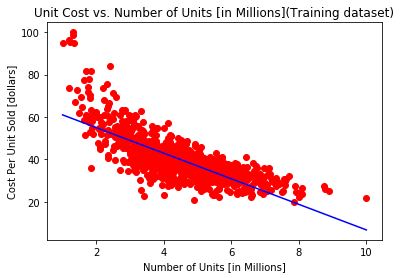

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Cost Per Unit Sold [dollars]')
plt.xlabel('Number of Units [in Millions]')
plt.title('Unit Cost vs. Number of Units [in Millions](Training dataset)')

# (SOLUTION #2: POLYNOMIAL ASSUMPTION)

# STEP#5 MODEL TRAINING

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=4)
# import a class and instantiate an object from that class


In [ ]:
# Transform the matrix of features X into a multi array of features X_Columns
# which contains the original features and their associated polynomial terms
X_columns = poly_regressor.fit_transform(X_train)

In [ ]:
print(X_columns)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [1.00000000e+00 1.18599365e+00 1.40658094e+00 1.66819606e+00
  1.97846993e+00]
 [1.00000000e+00 1.19149864e+00 1.41966901e+00 1.69153369e+00
  2.01546010e+00]
 ...
 [1.00000000e+00 8.78088812e+00 7.71039962e+01 6.77041565e+02
  5.94502623e+03]
 [1.00000000e+00 8.89769971e+00 7.91690601e+01 7.04422522e+02
  6.26774007e+03]
 [1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03
  1.00000000e+04]]


In [ ]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [ 0.00000000e+00 -5.43308190e+01  1.22452385e+01 -1.29910949e+00
  5.12914120e-02]
Linear Model Coefficient (b):  131.71715953602728


# STEP#6: VISUALIZE THE RESULTS

In [ ]:
X_train.shape

(1000, 1)

In [ ]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

In [ ]:
y_predict.shape

(1000,)

Text(0.5,1,'Unit Cost vs. Number of Units [in Millions](Training dataset)')

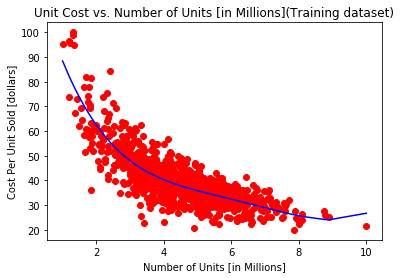

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_predict, color = 'blue')
plt.ylabel('Cost Per Unit Sold [dollars]')
plt.xlabel('Number of Units [in Millions]')
plt.title('Unit Cost vs. Number of Units [in Millions](Training dataset)')